<a href="https://colab.research.google.com/github/ManueloRZ2/MiniProyecto/blob/master/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sc
from scipy.signal import find_peaks
import statistics
import cv2
from scipy import signal


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's15.mat'
db15 = sio.loadmat(ruta+fileName)
X = db15['data']

############################# RESPIRACIÓN #############################################
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X[:,channel-1,:]
print("respiración:",respiration.shape)

###############################  GSR  ####################################################

channel = 37 # canal de la señal fisiológica
GSR = X[:,channel-1,:]
print("GSR:",respiration.shape)

############################## DERIVADA GSR ###############################################
DerivGSR= np.gradient(GSR[:,1])
DerivGSR
dataFrame=pd.DataFrame({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
dataFrame
############################### MEDIA GSR ####################################################

mediaGSR=np.mean(GSR, axis=1)
dataFrame['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
dataFrame
################################ MEDIA DERIV GSR #######################################
mediaDGSR=np.mean(DerivGSR, axis=0)
dataFrame['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR
dataFrame

################################ MEAN PATERN RESPIRATION #############################################

channel = 38 # canal de la señal fisiológica
PR = X[:,channel-1,:]
print("patern respiration:", PR.shape)
mediaPR=np.mean(PR, axis=1)
dataFrame['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración
dataFrame

################################# DERIV PATERN RESPIRATION ########################################
DerivPR= np.gradient(PR[:,1])
dataFrame['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración

################################# MEAN DERIVPR ######################################

mediaDPR=np.mean(DerivPR, axis=0)
dataFrame['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración

################################## DESV PR #####################################
desPR=statistics.stdev(PR[:,500])
dataFrame['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion


################################### EMG20 FRECUENCIA ##########################################
channel = 35 # canal de la señal fisiológica
EMG20 = X[19,channel-1,:]
peaks, _ = find_peaks(EMG20, height=-260)
freq=len(EMG20[peaks])
dataFrame['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

################################### POT EMG20 ###################################################
EMG20 = X[:,channel-1,:]
EMG2=EMG20**2
dataFrame['EnergiaEMG']= sum(EMG2[:,1]) #Adiciona columna energia de EMG


###################################  MEDIA EMG #################################################
mediaEMG=np.mean(EMG20, axis=1)
dataFrame['MeanEMG']= mediaEMG  #Adiciona columna media de EMG


################################### VAR EMG ##################################################
varianzaEMG=np.var(EMG20,axis=1)
dataFrame['VarEMG']= varianzaEMG #Adiciona columna varianza EMG

################################## EOG FRECUENCIA #######################################################
channel = 33 # canal de la señal fisiológica
EOGH20 = X[19,channel-1,:]
peaks, _ = find_peaks(EOGH20, height=-260)
dataFrame['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

#################################### POT EOG ################################################
EOGH20 = X[:,channel-1,:]
EOGH2=EOGH20**2
dataFrame['EnergyEOGH']= sum(EOGH2[:,1])  #Adiciona columna Energia de la señal EOGH

################################### MEDIA EOG #############################################
mediaEOGH=np.mean(EOGH20, axis=1)
dataFrame['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

##################################### VAR EOG ############################################
varianzaEOGH=np.var(EOGH20, axis=1)
dataFrame['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

##################################### EOGV20 #########################################
channel = 34 # canal de la señal fisiológica
EOGV20 = X[19,channel-1,:]
peaks, _ = find_peaks(EOGV20, height=-260)
dataFrame['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

#################################### EOGV20 #############################################
EOGV20= X[:,channel-1,:]
EOGV2=EOGV20**2
dataFrame['EnergyEOGV']= sum(EOGV2[:,1]) #Adiciona columna energia de la EOG

################################### MEAN EOGV20 #########################################
mediaEOGV=np.mean(EOGV20, axis=1)
dataFrame['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

##################################### VAR EOGV20 ################################
varianzaEOGV=np.var(EOGV20)
dataFrame['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV


###################################  EEG #########################################

#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X[:,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X[:,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X[:,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X[:,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X[:,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X[:,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X[:,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X[:,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X[:,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X[:,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X[:,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X[:,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X[:,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X[:,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X[:,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X[:,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X[:,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X[:,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X[:,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X[:,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X[:,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X[:,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X[:,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X[:,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X[:,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X[:,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X[:,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X[:,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X[:,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X[:,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X[:,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X[:,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2
#################################### PotAssFPIFP2 #################################
fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
dataFrame['PotAssFPIFP2']= np.sum(Pxx_den1)  

#################################### assAF3AF4 #################################### 
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
dataFrame['PotAssF3AF4']= np.sum(Pxx_den2)  

#################################### assF3F4 #################################### 
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
dataFrame['PotAssF3F4']= np.sum(Pxx_den3)  

#################################### assF7F8 #################################### *************************
#f, Pxx_den3 = signal.welch(assF7F8, fs, nperseg=64)
#dataFrame['PotAssF7F8']= np.sum(Pxx_den3)  

#################################### assFC5FC6 #################################### 
f, Pxx_den3 = signal.welch(assFC5FC6, fs, nperseg=64)
dataFrame['PotAssFC5FC6']= np.sum(Pxx_den3)  

#################################### assFC1FC2 #################################### 
f, Pxx_den3 = signal.welch(assFC1FC2, fs, nperseg=64)
dataFrame['PotAssFC1FC2']= np.sum(Pxx_den3)  

#################################### assC3C4 #################################### 
f, Pxx_den3 = signal.welch(assC3C4, fs, nperseg=64)
dataFrame['PotAssC3C4']= np.sum(Pxx_den3)  

#################################### assT7T8 #################################### 
f, Pxx_den3 = signal.welch(assT7T8, fs, nperseg=64)
dataFrame['PotAssT7T8']= np.sum(Pxx_den3)  

#################################### assCP5CP6 #################################### 
f, Pxx_den3 = signal.welch(assCP5CP6, fs, nperseg=64)
dataFrame['PotAssCP5CP6']= np.sum(Pxx_den3)  

#################################### assCP1CP2 #################################### 
f, Pxx_den3 = signal.welch(assCP1CP2, fs, nperseg=64)
dataFrame['PotAssCP1CP2']= np.sum(Pxx_den3) 

#################################### assP3P4 #################################### 
f, Pxx_den3 = signal.welch(assP3P4, fs, nperseg=64)
dataFrame['PotAssP3P4']= np.sum(Pxx_den3) 

#################################### assP7P8 #################################### 
f, Pxx_den3 = signal.welch(assP7P8, fs, nperseg=64)
dataFrame['PotAssP7P8']= np.sum(Pxx_den3) 

#################################### assPO3PO4 #################################### 
f, Pxx_den3 = signal.welch(assPO3PO4, fs, nperseg=64)
dataFrame['PotAssPO3PO4']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame['PotAssO1O2']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame['PotAssO1O2']= np.sum(Pxx_den3) 
dataFrame

################################## VALENCIA ETIQUETAS #####################################
labels = db15['labels']
dataFrame['VALENCIA']= labels[:,0]

################################# AROUSAL #################################################
dataFrame['AROUSAL']= labels[:,1]
#dataFrame

respiración: (40, 6528)
GSR: (40, 6528)
patern respiration: (40, 6528)


In [4]:
ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's16.mat'
db16 = sio.loadmat(ruta+fileName)
X2 = db16['data']

############################# RESPIRACIÓN #############################################
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X2[:,channel-1,:]
print("respiración:",respiration.shape)

###############################  GSR  ####################################################

channel = 37 # canal de la señal fisiológica
GSR = X2[:,channel-1,:]
print("GSR:",respiration.shape)

############################## DERIVADA GSR ###############################################
DerivGSR= np.gradient(GSR[:,1])
DerivGSR
dataFrame2=pd.DataFrame({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
dataFrame2
############################### MEDIA GSR ####################################################

mediaGSR=np.mean(GSR, axis=1)
dataFrame2['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
dataFrame2
################################ MEDIA DERIV GSR #######################################
mediaDGSR=np.mean(DerivGSR, axis=0)
dataFrame2['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR
dataFrame2

################################ MEAN PATERN RESPIRATION #############################################

channel = 38 # canal de la señal fisiológica
PR = X2[:,channel-1,:]
print("patern respiration:", PR.shape)
mediaPR=np.mean(PR, axis=1)
dataFrame2['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración
dataFrame2

################################# DERIV PATERN RESPIRATION ########################################
DerivPR= np.gradient(PR[:,1])
dataFrame2['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración

################################# MEAN DERIVPR ######################################

mediaDPR=np.mean(DerivPR, axis=0)
dataFrame2['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración

################################## DESV PR #####################################
desPR=statistics.stdev(PR[:,500])
dataFrame2['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion


################################### EMG20 FRECUENCIA ##########################################
channel = 35 # canal de la señal fisiológica
EMG20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EMG20, height=-260)
freq=len(EMG20[peaks])
dataFrame2['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

################################### POT EMG20 ###################################################
EMG20 = X2[:,channel-1,:]
EMG2=EMG20**2
dataFrame2['EnergiaEMG']= sum(EMG2[:,1]) #Adiciona columna energia de EMG


###################################  MEDIA EMG #################################################
mediaEMG=np.mean(EMG20, axis=1)
dataFrame2['MeanEMG']= mediaEMG  #Adiciona columna media de EMG


################################### VAR EMG ##################################################
varianzaEMG=np.var(EMG20,axis=1)
dataFrame2['VarEMG']= varianzaEMG #Adiciona columna varianza EMG

################################## EOG FRECUENCIA #######################################################
channel = 33 # canal de la señal fisiológica
EOGH20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EOGH20, height=-260)
dataFrame2['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

#################################### POT EOG ################################################
EOGH20 = X2[:,channel-1,:]
EOGH2=EOGH20**2
dataFrame2['EnergyEOGH']= sum(EOGH2[:,1])  #Adiciona columna Energia de la señal EOGH

################################### MEDIA EOG #############################################
mediaEOGH=np.mean(EOGH20, axis=1)
dataFrame2['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

##################################### VAR EOG ############################################
varianzaEOGH=np.var(EOGH20, axis=1)
dataFrame2['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

##################################### EOGV20 #########################################
channel = 34 # canal de la señal fisiológica
EOGV20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EOGV20, height=-260)
dataFrame2['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

#################################### EOGV20 #############################################
EOGV20= X2[:,channel-1,:]
EOGV2=EOGV20**2
dataFrame2['EnergyEOGV']= sum(EOGV2[:,1]) #Adiciona columna energia de la EOG

################################### MEAN EOGV20 #########################################
mediaEOGV=np.mean(EOGV20, axis=1)
dataFrame2['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

##################################### VAR EOGV20 ################################
varianzaEOGV=np.var(EOGV20)
dataFrame2['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV


###################################  EEG #########################################

#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X2[:,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X2[:,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X2[:,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X2[:,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X2[:,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X2[:,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X2[:,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X2[:,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X2[:,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X2[:,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X2[:,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X2[:,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X2[:,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X2[:,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X2[:,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X2[:,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X2[:,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X2[:,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X2[:,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X2[:,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X2[:,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X2[:,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X2[:,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X2[:,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X2[:,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X2[:,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X2[:,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X2[:,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X2[:,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X2[:,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X2[:,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X2[:,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2
#################################### PotAssFPIFP2 #################################
fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
dataFrame2['PotAssFPIFP2']= np.sum(Pxx_den1)  

#################################### assAF3AF4 #################################### 
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
dataFrame2['PotAssF3AF4']= np.sum(Pxx_den2)  

#################################### assF3F4 #################################### 
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
dataFrame2['PotAssF3F4']= np.sum(Pxx_den3)  

#################################### assF7F8 #################################### *************************
#f, Pxx_den3 = signal.welch(assF7F8, fs, nperseg=64)
#dataFrame2['PotAssF7F8']= np.sum(Pxx_den3)  

#################################### assFC5FC6 #################################### 
f, Pxx_den3 = signal.welch(assFC5FC6, fs, nperseg=64)
dataFrame2['PotAssFC5FC6']= np.sum(Pxx_den3)  

#################################### assFC1FC2 #################################### 
f, Pxx_den3 = signal.welch(assFC1FC2, fs, nperseg=64)
dataFrame2['PotAssFC1FC2']= np.sum(Pxx_den3)  

#################################### assC3C4 #################################### 
f, Pxx_den3 = signal.welch(assC3C4, fs, nperseg=64)
dataFrame2['PotAssC3C4']= np.sum(Pxx_den3)  

#################################### assT7T8 #################################### 
f, Pxx_den3 = signal.welch(assT7T8, fs, nperseg=64)
dataFrame2['PotAssT7T8']= np.sum(Pxx_den3)  

#################################### assCP5CP6 #################################### 
f, Pxx_den3 = signal.welch(assCP5CP6, fs, nperseg=64)
dataFrame2['PotAssCP5CP6']= np.sum(Pxx_den3)  

#################################### assCP1CP2 #################################### 
f, Pxx_den3 = signal.welch(assCP1CP2, fs, nperseg=64)
dataFrame2['PotAssCP1CP2']= np.sum(Pxx_den3) 

#################################### assP3P4 #################################### 
f, Pxx_den3 = signal.welch(assP3P4, fs, nperseg=64)
dataFrame2['PotAssP3P4']= np.sum(Pxx_den3) 

#################################### assP7P8 #################################### 
f, Pxx_den3 = signal.welch(assP7P8, fs, nperseg=64)
dataFrame2['PotAssP7P8']= np.sum(Pxx_den3) 

#################################### assPO3PO4 #################################### 
f, Pxx_den3 = signal.welch(assPO3PO4, fs, nperseg=64)
dataFrame2['PotAssPO3PO4']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame2['PotAssO1O2']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame2['PotAssO1O2']= np.sum(Pxx_den3) 
dataFrame2

################################## VALENCIA ETIQUETAS #####################################
labels2 = db16['labels']
dataFrame2['VALENCIA']= labels2[:,0]

################################# AROUSAL #################################################
dataFrame2['AROUSAL']= labels2[:,1]
#dataFrame2

respiración: (40, 6528)
GSR: (40, 6528)
patern respiration: (40, 6528)


In [5]:
ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's13.mat'
db13 = sio.loadmat(ruta+fileName)
X3 = db13['data']

############################# RESPIRACIÓN #############################################
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X3[:,channel-1,:]
print("respiración:",respiration.shape)

###############################  GSR  ####################################################

channel = 37 # canal de la señal fisiológica
GSR = X3[:,channel-1,:]
print("GSR:",respiration.shape)

############################## DERIVADA GSR ###############################################
DerivGSR= np.gradient(GSR[:,1])
DerivGSR
dataFrame3=pd.DataFrame({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
dataFrame3
############################### MEDIA GSR ####################################################

mediaGSR=np.mean(GSR, axis=1)
dataFrame3['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
dataFrame3
################################ MEDIA DERIV GSR #######################################
mediaDGSR=np.mean(DerivGSR, axis=0)
dataFrame3['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR
dataFrame3

################################ MEAN PATERN RESPIRATION #############################################

channel = 38 # canal de la señal fisiológica
PR = X3[:,channel-1,:]
print("patern respiration:", PR.shape)
mediaPR=np.mean(PR, axis=1)
dataFrame3['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración
dataFrame3

################################# DERIV PATERN RESPIRATION ########################################
DerivPR= np.gradient(PR[:,1])
dataFrame3['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración

################################# MEAN DERIVPR ######################################

mediaDPR=np.mean(DerivPR, axis=0)
dataFrame3['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración

################################## DESV PR #####################################
desPR=statistics.stdev(PR[:,500])
dataFrame3['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion


################################### EMG20 FRECUENCIA ##########################################
channel = 35 # canal de la señal fisiológica
EMG20 = X3[19,channel-1,:]
peaks, _ = find_peaks(EMG20, height=-260)
freq=len(EMG20[peaks])
dataFrame3['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

################################### POT EMG20 ###################################################
EMG20 = X3[:,channel-1,:]
EMG2=EMG20**2
dataFrame3['EnergiaEMG']= sum(EMG2[:,1]) #Adiciona columna energia de EMG


###################################  MEDIA EMG #################################################
mediaEMG=np.mean(EMG20, axis=1)
dataFrame3['MeanEMG']= mediaEMG  #Adiciona columna media de EMG


################################### VAR EMG ##################################################
varianzaEMG=np.var(EMG20,axis=1)
dataFrame3['VarEMG']= varianzaEMG #Adiciona columna varianza EMG

################################## EOG FRECUENCIA #######################################################
channel = 33 # canal de la señal fisiológica
EOGH20 = X3[19,channel-1,:]
peaks, _ = find_peaks(EOGH20, height=-260)
dataFrame3['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

#################################### POT EOG ################################################
EOGH20 = X3[:,channel-1,:]
EOGH2=EOGH20**2
dataFrame3['EnergyEOGH']= sum(EOGH2[:,1])  #Adiciona columna Energia de la señal EOGH

################################### MEDIA EOG #############################################
mediaEOGH=np.mean(EOGH20, axis=1)
dataFrame3['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

##################################### VAR EOG ############################################
varianzaEOGH=np.var(EOGH20, axis=1)
dataFrame3['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

##################################### EOGV20 #########################################
channel = 34 # canal de la señal fisiológica
EOGV20 = X3[19,channel-1,:]
peaks, _ = find_peaks(EOGV20, height=-260)
dataFrame3['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

#################################### EOGV20 #############################################
EOGV20= X3[:,channel-1,:]
EOGV2=EOGV20**2
dataFrame3['EnergyEOGV']= sum(EOGV2[:,1]) #Adiciona columna energia de la EOG

################################### MEAN EOGV20 #########################################
mediaEOGV=np.mean(EOGV20, axis=1)
dataFrame3['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

##################################### VAR EOGV20 ################################
varianzaEOGV=np.var(EOGV20)
dataFrame3['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV


###################################  EEG #########################################

#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X3[:,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X3[:,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X3[:,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X3[:,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X3[:,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X3[:,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X3[:,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X3[:,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X3[:,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X3[:,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X3[:,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X3[:,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X3[:,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X3[:,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X3[:,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X3[:,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X3[:,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X3[:,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X3[:,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X3[:,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X3[:,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X3[:,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X3[:,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X3[:,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X3[:,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X3[:,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X3[:,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X3[:,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X3[:,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X3[:,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X3[:,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X3[:,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2
#################################### PotAssFPIFP2 #################################
fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
dataFrame3['PotAssFPIFP2']= np.sum(Pxx_den1)  

#################################### assAF3AF4 #################################### 
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
dataFrame3['PotAssF3AF4']= np.sum(Pxx_den2)  

#################################### assF3F4 #################################### 
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
dataFrame3['PotAssF3F4']= np.sum(Pxx_den3)  

#################################### assF7F8 #################################### *************************
#f, Pxx_den3 = signal.welch(assF7F8, fs, nperseg=64)
#dataFrame3['PotAssF7F8']= np.sum(Pxx_den3)  

#################################### assFC5FC6 #################################### 
f, Pxx_den3 = signal.welch(assFC5FC6, fs, nperseg=64)
dataFrame3['PotAssFC5FC6']= np.sum(Pxx_den3)  

#################################### assFC1FC2 #################################### 
f, Pxx_den3 = signal.welch(assFC1FC2, fs, nperseg=64)
dataFrame3['PotAssFC1FC2']= np.sum(Pxx_den3)  

#################################### assC3C4 #################################### 
f, Pxx_den3 = signal.welch(assC3C4, fs, nperseg=64)
dataFrame3['PotAssC3C4']= np.sum(Pxx_den3)  

#################################### assT7T8 #################################### 
f, Pxx_den3 = signal.welch(assT7T8, fs, nperseg=64)
dataFrame3['PotAssT7T8']= np.sum(Pxx_den3)  

#################################### assCP5CP6 #################################### 
f, Pxx_den3 = signal.welch(assCP5CP6, fs, nperseg=64)
dataFrame3['PotAssCP5CP6']= np.sum(Pxx_den3)  

#################################### assCP1CP2 #################################### 
f, Pxx_den3 = signal.welch(assCP1CP2, fs, nperseg=64)
dataFrame3['PotAssCP1CP2']= np.sum(Pxx_den3) 

#################################### assP3P4 #################################### 
f, Pxx_den3 = signal.welch(assP3P4, fs, nperseg=64)
dataFrame3['PotAssP3P4']= np.sum(Pxx_den3) 

#################################### assP7P8 #################################### 
f, Pxx_den3 = signal.welch(assP7P8, fs, nperseg=64)
dataFrame3['PotAssP7P8']= np.sum(Pxx_den3) 

#################################### assPO3PO4 #################################### 
f, Pxx_den3 = signal.welch(assPO3PO4, fs, nperseg=64)
dataFrame3['PotAssPO3PO4']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame3['PotAssO1O2']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame3['PotAssO1O2']= np.sum(Pxx_den3) 
dataFrame3

################################## VALENCIA ETIQUETAS #####################################
labels3 = db13['labels']
dataFrame3['VALENCIA']= labels3[:,0]

################################# AROUSAL #################################################
dataFrame3['AROUSAL']= labels3[:,1]
#dataFrame3

respiración: (40, 6528)
GSR: (40, 6528)
patern respiration: (40, 6528)


In [6]:
##### Union de data frames
DataFrameUlti= pd.concat([dataFrame,dataFrame2,dataFrame3], axis=0)
DataFrameUlti

,DerivadaGSR,MeanGSR,MeanDerivGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV,MeanEOGV,VarEOGV,PotAssFPIFP2,PotAssF3AF4,PotAssF3F4,PotAssFC5FC6,PotAssFC1FC2,PotAssC3C4,PotAssT7T8,PotAssCP5CP6,PotAssCP1CP2,PotAssP3P4,PotAssP7P8,PotAssPO3PO4,PotAssO1O2,VALENCIA,AROUSAL
0,1547.657286,-2828.219547,18.909924,-9790.368045,-4878.192646,-208.747024,4535.621729,41.549020,27218.456240,98.125565,5803.573553,41.549020,786717.641133,-66.462169,3833.058700,41.549020,421022.234397,-403.357423,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.535810,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.90,5.86
1,29.644519,-2460.156985,18.909924,-1613.646634,-957.719503,-208.747024,4535.621729,41.549020,27218.456240,-50.564432,1652.928242,41.549020,786717.641133,-33.306670,6297.053624,41.549020,421022.234397,-349.505204,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.535810,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,5.04,4.06
2,-716.893332,337.611653,18.909924,-4198.027600,-805.644060,-208.747024,4535.621729,41.549020,27218.456240,28.409233,897.406943,41.549020,786717.641133,110.917438,9763.488928,41.549020,421022.234397,-232.183844,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.535810,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,5.00
3,380.561622,779.745012,18.909924,-3572.857575,-3368.825196,-208.747024,4535.621729,41.549020,27218.456240,-11.632078,1865.273252,41.549020,786717.641133,107.926932,10991.908385,41.549020,421022.234397,-150.232661,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.535810,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,3.96
4,-573.781728,-5690.707874,18.909924,-11699.104326,-1084.117015,-208.747024,4535.621729,41.549020,27218.456240,-78.287644,4914.083039,41.549020,786717.641133,15.428189,7068.310597,41.549020,421022.234397,-173.164298,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.535810,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,-259.953161,2640.655662,0.198333,-522.747799,-1143.905357,21.913892,957.327845,37.980392,11345.259327,111.848072,1637.141422,37.980392,45864.934230,105.959914,4108.274224,37.980392,864698.322304,-294.923566,243871.681267,2055.475942,521.974830,8468.345965,1167.837969,1241.703282,2366.707055,70271.880316,1482.830856,396.782634,12987.238885,3563.246461,4190.206059,871.804665,2.54,8.01
36,-328.985496,5401.003637,0.198333,-1599.763354,304.309415,21.913892,957.327845,37.980392,11345.259327,-51.722312,26020.743061,37.980392,45864.934230,-56.960827,3634.694450,37.980392,864698.322304,-104.150619,243871.681267,2055.475942,521.974830,8468.345965,1167.837969,1241.703282,2366.707055,70271.880316,1482.830856,396.782634,12987.238885,3563.246461,4190.206059,871.804665,1.00,8.97
37,812.121146,4326.553200,0.198333,1067.341428,1211.850015,21.913892,957.327845,37.980392,11345.259327,36.795270,1178.681538,37.980392,45864.934230,-24.759184,2690.190794,37.980392,864698.322304,-1558.747795,243871.681267,2055.475942,521.974830,8468.345965,1167.837969,1241.703282,2366.707055,70271.880316,1482.830856,396.782634,12987.238885,3563.246461,4190.206059,871.804665,1.00,9.00
38,398.881941,-1273.794848,0.198333,-1179.657919,548.927371,21.913892,957.327845,37.980392,11345.259327,251.061964,25221.708658,37.980392,45864.934230,-92.396400,5897.499494,37.980392,864698.322304,-121.348600,243871.681267,2055.475942,521.974830,8468.345965,1167.837969,1241.703282,2366.707055,70271.880316,1482.830856,396.782634,12987.

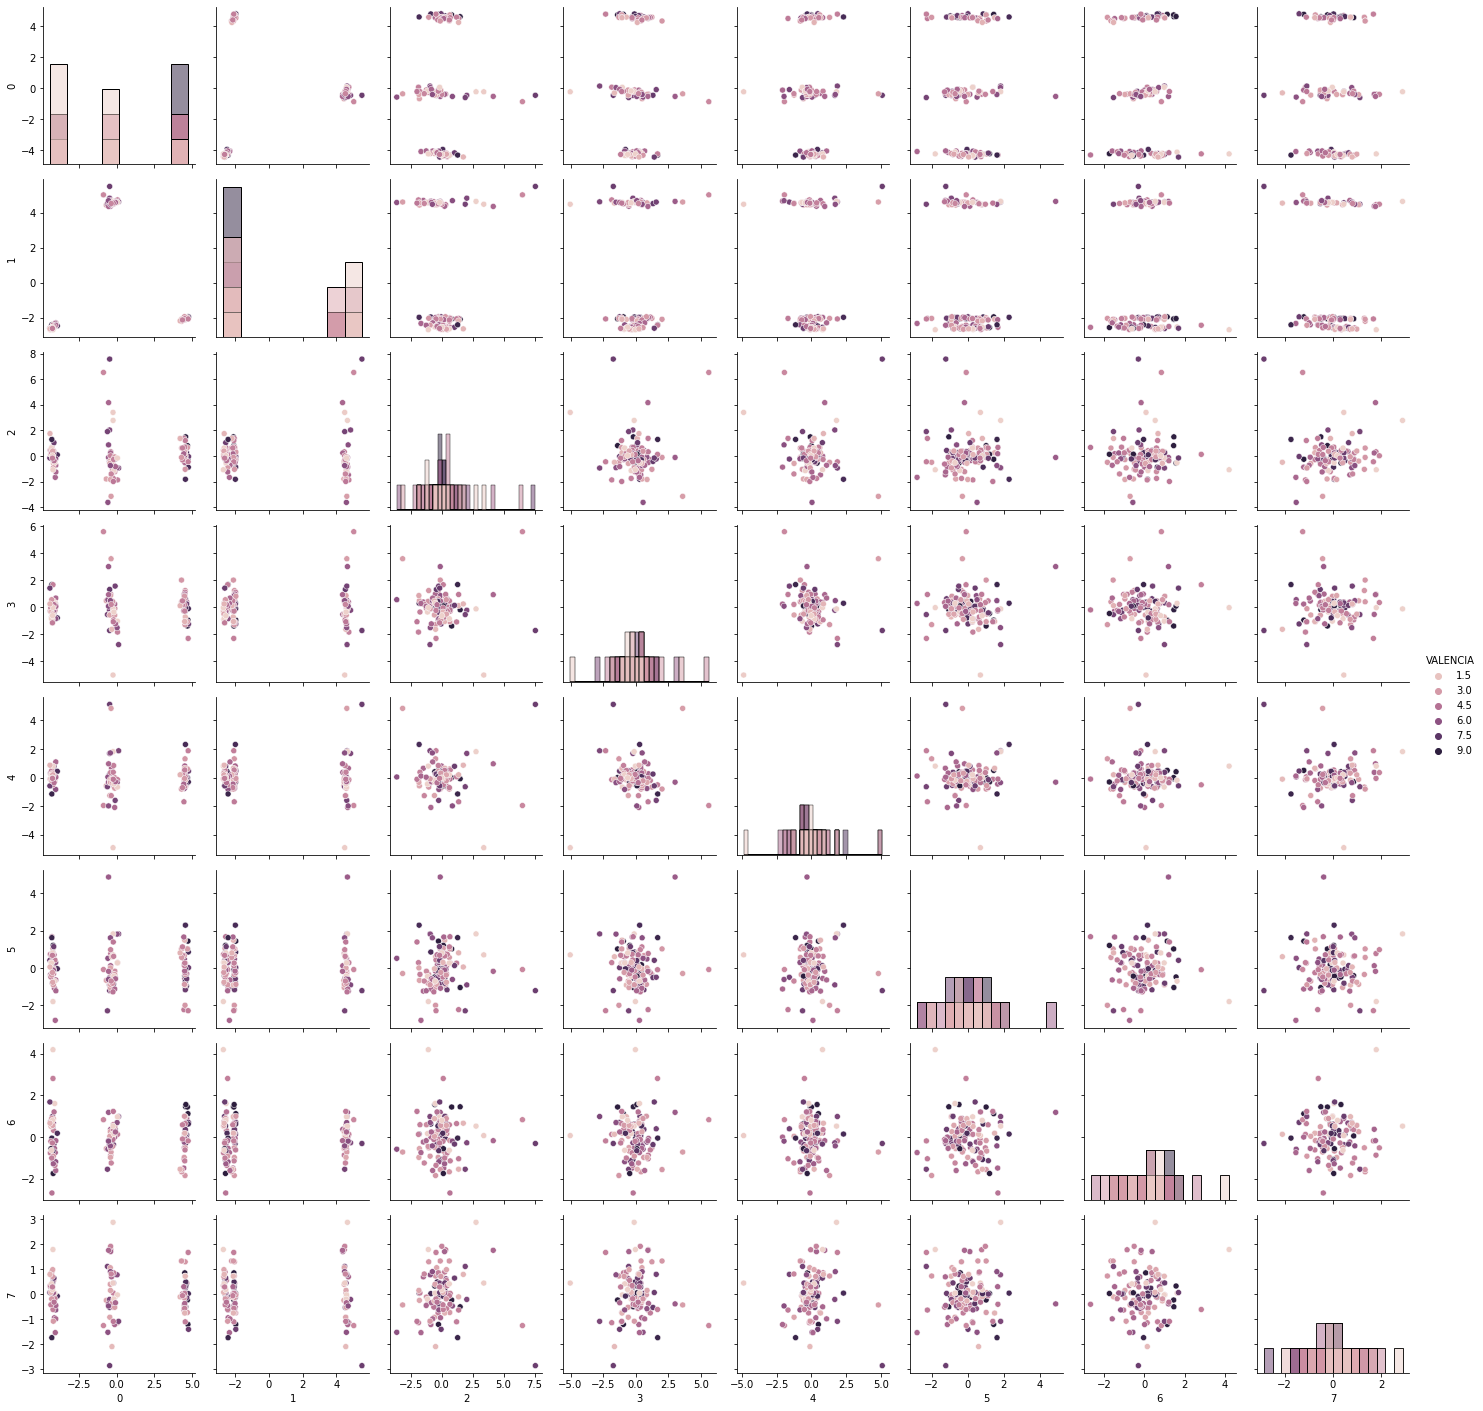

In [7]:
##MINI-PROYECTO 2: Punto 1

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
from sklearn.decomposition import PCA

# para indexar un dataframe en pandas utilizamos iloc y la convención normal
X = DataFrameUlti.drop(['VALENCIA'],axis=1)
X = X.values

# Se escalan los datos debido a que presentan dimensiones numéricas elevadas, dependiendo del tipo de características
from sklearn.preprocessing import scale
X = scale(X)

# Luego definimos el número de componentes y se crea el modelo PCA
pca = PCA(n_components=8)
pca.fit(X)
# Se transforman los datos al espacio latente
X_pca = pca.transform(X)
# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_pca)
labels  = DataFrameUlti["VALENCIA"]
dataXpca['VALENCIA'] = labels.values

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="VALENCIA")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [18]:
DF=DataFrameUlti
DF['VALENCIA']=DF['VALENCIA'].astype(int)
DF['AROUSAL']=DF['AROUSAL'].astype(int)
Valence = DF.VALENCIA.array
Arousal = DF.AROUSAL.array


In [19]:
negA = np.logical_and(Arousal>=1,Arousal<=3)
negV = np.logical_and(Valence>=1,Valence<=3)
neutralA = np.logical_and(Arousal>3,Arousal<7)
neutralV = np.logical_and(Valence>3,Valence<7)
posA = Arousal>=7
posV = Valence>=7
Etiquetas = np.zeros((120,1))
# Emocion Negativa negA y negV
Etiquetas[np.where(np.logical_and(negA,negV))] = 1.
# Emocion Neutral neutralA y neutralV
Etiquetas[np.where(np.logical_and(neutralA,neutralA))] = 2.
# Emocion Positiva posA y posV
Etiquetas[np.where(np.logical_and(posA,posV))] = 3.
# Emocion Stress posA y negV
Etiquetas[np.where(np.logical_and(posA,negV))] = 4.
# Emocion Calm negA y posV
Etiquetas[np.where(np.logical_and(negA,posV))] = 5.
# Emocion Tristeza neutralA y negV
Etiquetas[np.where(np.logical_and(neutralA,negV))] = 6.
# Emocion Satisfecho (Pleasant) neutralA y posV
Etiquetas[np.where(np.logical_and(neutralA,posV))] = 7.
# Emocion Tranquilidad negA y neutralV
Etiquetas[np.where(np.logical_and(negA,neutralV))] = 8.
# Emocion Sorpresa posA y neutralV
Etiquetas[np.where(np.logical_and(posA,neutralV))] = 9.
 

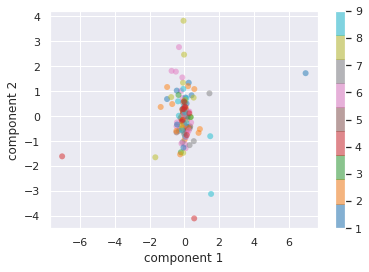

In [20]:
plt.scatter(X[:, 0], X[:, 1],
            c=Etiquetas, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 9))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [21]:
####CLASIFICACIÓN BAYESIANO

#X: matrix con los valores y las caracteristicas
#X_pca: modelo pca

from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB()
# Se entrena el modelo
model.fit(X,Etiquetas)
# Se realiza una predicción
pred1 = model.predict(X)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred1)
#print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,pred1))
print('Confunsion Matrix: \n', confusion_matrix(pred1,Etiquetas))


#Modelo bayesiano con PCA

# Se crea el modelo 
model = GaussianNB()

model.fit(X_pca,Etiquetas)
# Se realiza una predicción
pred2 = model.predict(X_pca)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred1)
#print('Etq reales: ', Etiquetas)

print('Accuracy: ', accuracy_score(Etiquetas,pred2))
print('Confunsion Matrix: \n', confusion_matrix(pred2,Etiquetas))



Accuracy:  0.30833333333333335
Confunsion Matrix: 
 [[10  3  0  0  0  5  1  7  0]
 [ 0  4  0  0  0  1  0  0  0]
 [ 0  3  5  5  0  2  4  0  6]
 [ 0  2  0  4  0  0  0  0  0]
 [ 1  7  1  2  5  9 10  4  1]
 [ 0  0  0  0  0  2  0  1  1]
 [ 0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  2  0  2  2  0  4]]
Accuracy:  0.4666666666666667
Confunsion Matrix: 
 [[10  0  0  0  0  2  1  2  0]
 [ 0  6  0  2  0  5  0  2  0]
 [ 0  4  5  5  0  3  5  0  7]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  5  0  1  0  0]
 [ 1  2  1  0  0  5  1  0  1]
 [ 0  5  0  0  0  2  9  2  0]
 [ 0  2  0  0  0  3  0  9  0]
 [ 0  0  0  3  0  1  1  0  4]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
####CLASIFICACIÓN REGRESIÓN LOGISTICA

#X: matrix con los valores y las caracteristicas
#X_pca: modelo pca

# Importamos la librería del modelo de regresión logística
from  sklearn.linear_model import LogisticRegression
# Se crea el modelo 
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X,Etiquetas)
# Se realiza una predicción
pred3 = modelRL.predict(X)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred3)
#print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,pred3))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,pred3))


#Modelo Regresión logistica con PCA

modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X_pca,Etiquetas)
# Se realiza una predicción
pred4 = modelRL.predict(X_pca)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred3)
#print('Etq reales: ', Etiquetas)

print('Accuracy: ', accuracy_score(Etiquetas,pred4))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,pred4))

Accuracy:  0.6416666666666667
Confunsion Matrix: 
 [[10  0  0  0  0  0  0  1  0]
 [ 0  9  0  0  0  5  4  1  0]
 [ 0  2  0  2  0  0  1  0  1]
 [ 0  0  0 11  0  1  0  0  1]
 [ 0  0  0  0  2  0  1  2  0]
 [ 0  2  0  0  0 15  3  1  0]
 [ 0  2  0  0  1  2 12  1  0]
 [ 2  0  0  0  0  1  0 12  0]
 [ 0  0  0  4  0  1  1  0  6]]
Accuracy:  0.43333333333333335
Confunsion Matrix: 
 [[ 7  0  0  0  0  3  0  1  0]
 [ 1  9  0  0  0  5  2  2  0]
 [ 0  1  1  1  0  0  1  0  2]
 [ 0  1  0 11  0  0  1  0  0]
 [ 0  0  0  0  0  4  1  0  0]
 [ 2  5  0  0  0  4  7  3  0]
 [ 0  1  0  1  0  4  9  1  2]
 [ 4  1  0  0  0  1  2  7  0]
 [ 0  0  0  5  0  1  2  0  4]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

**CONCLUSIONES**

*   Al comparar el modelo de clasificación lineal **Bayesiano** con el modelo lineal de **Regresión Logística**, se observa que se obtiene un mejor resultado con el modelo de Regresión Logística, ya que este  hace una mejor predicción de las emociones arrojando un porcentaje del 68.33%, a diferencia del modelo Bayesiano que arroja un porcentaje del 30.83%, un resultado muy deficiente para un sistema. Este resultado se obtuvo sin realizar el modelo PCA (Principal Component Analysis) y usando un número de componentes **q=8**, lo que requiere un costo computacional más alto, pero a cambio obteniendo una mejor predicción de las emociones del sujeto.
*   Al aplicarle PCA a los datos, el resultado no es muy favorecedor, ya que la predicción que realizan los modelos de Clasifcación lineales es menor al 50%, por lo que su desempeño no es óptimo. Al ir disminutendo el valor de configuración de **q** en el espacio latente, el porcentaje de predicción de ambos modelos dismuye notablemente, pero se sigue opteniendo un porcentaje más alto con el modelo de claisificación lineal de Regresión logística, aunque al llegar a **q=2** , ambos modelos obtienen el mismo porcentaje de predicción igual al 24.16%, lo que nos lleva a concluir, que al realizar el modelo **PCA** a los datos, ninguno de los dos modelos de clasificación líneal es el indicado para realizar una correcta predicción de las emociones de los sujetos al observar los vídeos. 



In [118]:
##MINI-PROYECTO 2: Punto 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.data.shape)
etiquetas= faces['images'].astype(int)
PartEtiquetas = np.array(etiquetas[:,1,0])



['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 2914)


In [110]:
pca = PCA(1000,svd_solver='randomized')
pca.fit(faces.data)


PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [111]:
# Compute the components and projected faces
pca = PCA(1000).fit(faces.data)
Xfaces = faces.data
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
x_pca = pca.transform(Xfaces)


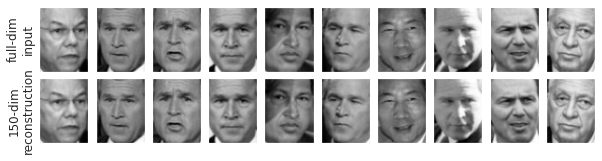

In [112]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [113]:
####CLASIFICACIÓN BAYESIANO

#Se importa la librería del modelo de Clasificación Bayesiana
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB()
# Se entrena el modelo
model.fit(x_pca,PartEtiquetas)
# Se realiza una predicción
pred5 = model.predict(x_pca)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred1)
#print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(PartEtiquetas,pred5)*100, '%')
print('Confunsion Matrix: \n', confusion_matrix(pred5,PartEtiquetas))

Accuracy:  99.92581602373886 %
Confunsion Matrix: 
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [117]:
####CLASIFICACIÓN REGRESIÓN LOGISTICA

# Importamos la librería del modelo de regresión logística
from  sklearn.linear_model import LogisticRegression
# Se crea el modelo 
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(x_pca,PartEtiquetas)
# Se realiza una predicción
pred6 = modelRL.predict(x_pca)

# Evaluación del rendimiento
#print('Etq estimadas: ', pred6)
#print('Etq reales: ', PartEtiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(PartEtiquetas,pred6)*100, '%')
print('Confunsion Matrix: \n', confusion_matrix(PartEtiquetas,pred6))


Accuracy:  100.0 %
Confunsion Matrix: 
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
